In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
#from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import pandas as pd
import pickle

#pickle_file = open("RQ3_Input_Dataset2",'rb')
##--LDA File
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df
##--Sentiment file
##FINAL_Dataset1_Pickle.data 
##FINAL_Dataset2_Pickle.data
##RQ3_Input_Dataset1.data
##RQ3_Input_Dataset2.data

df = pd.read_pickle("RQ3_Input_Dataset1.data")

In [2]:
pd.options.display.max_rows

60

In [3]:
df.head(5)

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,featureSentiScoreBool,featureSentiScorenormalized,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value
1,Instone Real Estate Group AG,Immobilien,May 2020,1,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung im Bereich Fin...,Empfohlen,Overall,4.9,Top Arbeitgeber mit vielen Benefiz Trans...,...,1.0,0.038507,0.98,1.0,0.8,1.0,1.0,1.0,1.0,4.842857
2,Instone Real Estate Group AG,Immobilien,May 2020,2,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Rec...,Empfohlen,Overall,4.9,Vorbildlicher Arbeitgeber Nur die Mülltre...,...,0.0,-0.029961,0.98,1.0,1.0,1.0,1.0,0.8,1.0,4.842857
3,Instone Real Estate Group AG,Immobilien,May 2020,3,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Empfohlen,Overall,4.5,Wenn Transparenz und Wertschätzung aufeinande...,...,1.0,0.345304,0.90,1.0,1.0,4.7,1.0,4.7,0.8,4.700000
4,Instone Real Estate Group AG,Immobilien,October 2019,4,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Personal / Aus- und Weiterbildu...,Nicht empfohlen,Overall,3.2,Anspruch und Wirklichkeit klaffen auseinander...,...,1.0,0.028910,0.64,0.6,0.6,0.6,0.8,0.4,0.6,3.028571
5,Instone Real Estate Group AG,Immobilien,October 2019,5,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung bei Instone Re...,Empfohlen,Overall,4.8,Toller Arbeitgeber Tolle Truppe Auch bei lä...,...,1.0,0.012521,0.96,1.0,1.0,1.0,1.0,1.0,0.8,4.828571


In [4]:
df.OrgSector.unique()

array(['Immobilien', 'Elektro/Elektronik', 'Sonstige Branchen',
       'Maschinenbau', 'Handel', 'Internet', 'Medizin/Pharma', 'IT',
       'Automobil', 'Industrie', 'Dienstleistung', 'Energie',
       'Marketing/Werbung/PR', 'Nahrungsmittel/Landwirtschaft', 'Chemie',
       'Finanz', 'Banken', 'Transport/Verkehr/Logistik',
       'Telekommunikation', 'Bau/Architektur', 'Versicherung',
       'Kunst/Kultur', 'Textil', ' Immobilien', 'Medien',
       'Personalwesen & -beschaffung', ' Industrie', 'Sport/Beauty',
       'Druck/Verpackung', 'Medizintechnik', 'Forschung/Entwicklung',
       'Beratung/Consulting'], dtype=object)

In [5]:
conditions = [(df["OrgSector"] == 'Immobilien'),
              (df["OrgSector"] == 'Elektro/Elektronik'),
              (df["OrgSector"] == 'Sonstige Branchen'),
              (df["OrgSector"] == 'Maschinenbau'),
              (df["OrgSector"] == 'Handel'),
              (df["OrgSector"] == 'Internet'),
              (df["OrgSector"] == 'Medizin/Pharma'),
              (df["OrgSector"] == 'IT'),
              (df["OrgSector"] == 'Automobil'),
              (df["OrgSector"] == 'Industrie'),
              (df["OrgSector"] == 'Dienstleistung'),
              (df["OrgSector"] == 'Energie'),
              (df["OrgSector"] == 'Marketing/Werbung/PR'),
              (df["OrgSector"] == 'Nahrungsmittel/Landwirtschaft'),              
              (df["OrgSector"] == 'Chemie'),
              (df["OrgSector"] == 'Finanz'),
              (df["OrgSector"] == 'Banken'),
              (df["OrgSector"] == 'Transport/Verkehr/Logistik'),
              (df["OrgSector"] == 'Telekommunikation'),
              (df["OrgSector"] == 'Bau/Architektur'),
              (df["OrgSector"] == 'Versicherung'),
              (df["OrgSector"] == 'Kunst/Kultur'),
              (df["OrgSector"] == 'Textil'),
              (df["OrgSector"] == ' Immobilien'),
              (df["OrgSector"] == 'Medien'),
              (df["OrgSector"] == 'Personalwesen & -beschaffung'),
              (df["OrgSector"] == ' Industrie'),
              (df["OrgSector"] == 'Sport/Beauty'),
              (df["OrgSector"] == 'Druck/Verpackung'),
              (df["OrgSector"] == 'Medizintechnik'),
              (df["OrgSector"] == 'Forschung/Entwicklung'),
              (df["OrgSector"] == 'Beratung/Consulting')
              ]
choices_NewOrgSector = ['Finance, Insurance, Real Estate', 'Manufacturing', 'Others', 'Manufacturing', 'Retail Trade',
                        'Services','Manufacturing','Manufacturing','Manufacturing','Manufacturing','Services',
                        'Transportation & Public Utilities','Services','Agriculture, Forestry, Fishing','Manufacturing',
                        'Finance, Insurance, Real Estate','Finance, Insurance, Real Estate','Transportation & Public Utilities',
                        'Transportation & Public Utilities','Construction','Finance, Insurance, Real Estate','Services',
                        'Manufacturing','Finance, Insurance, Real Estate','Services','Services','Manufacturing',
                        'Services','Manufacturing','Manufacturing','Services','Services']
df["NewOrgSector"] = np.select(conditions, choices_NewOrgSector, default='NaN')

In [6]:
df.columns

Index(['Org', 'OrgSector', 'RverMonthYear', 'RverReviewer', 'RverPosition',
       'RverLoc', 'RverRecom', 'RvReviewAbout', 'RvScore', 'RvComment',
       'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues',
       'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues',
       'RvScoreEnvironmentalSocialAwareness', 'Corona1', 'Corona2', 'Corona3',
       'RvScoreWorkLifeBalance', 'topic0', 'topic1', 'topic2', 'topic3',
       'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10',
       'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16',
       'topic17', 'forTSNEYear', 'forTSNECity', 'topic0_max', 'topic1_max',
       'topic2_max', 'topic3_max', 'topic4_max', 'topic5_max', 'topic6_max',
       'topic7_max', 'topic8_max', 'topic9_max', 'topic10_max', 'topic11_max',
       'topic12_max', 'topic13_max', 'topic14_max', 'topic15_max',
       'topic16_max', 'topic17_max', 'score101', 'topicXmaxboolXcss0',
       'topicXmaxboolXcss1', 'topicXmaxboolXcss

In [7]:
df['NewOrgSector'].value_counts()

Manufacturing                        11091
Transportation & Public Utilities     3221
Services                              2808
Finance, Insurance, Real Estate       2514
Retail Trade                          1044
Others                                 153
Construction                            94
Agriculture, Forestry, Fishing          72
Name: NewOrgSector, dtype: int64

In [8]:
df_Manufacturing = df[df['NewOrgSector'] == 'Manufacturing']
df_Transportation = df[df['NewOrgSector'] == 'Transportation & Public Utilities']
df_Services = df[df['NewOrgSector'] == 'Services']
df_Finance = df[df['NewOrgSector'] == 'Finance, Insurance, Real Estate']
df_Retail  = df[df['NewOrgSector'] == 'Retail Trade']
df_Others = df[df['NewOrgSector'] == 'Others']
df_Construction = df[df['NewOrgSector'] == 'Construction']
df_Agriculture = df[df['NewOrgSector'] == 'Agriculture, Forestry, Fishing']

listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#gapminder_2002 = gapminder[gapminder['year']==2002]

In [9]:
def calculate_pValue(df_Manufacturing, df_Construction):
    df_Construction =df_Construction.loc[:,'RvScore']
    #params = np.append(lm.intercept, lm.coef)
    #predictions = lm.predict(train_x_)
    
    dfnewX = pd.DataFrame({"Constant": np.ones(len(df_Manufacturing))}).join(pd.DataFrame(df_Manufacturing))
    MSE = (sum((df_Construction - predictions) ** 2)) / (len(dfnewX) - len(dfnewX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    #var_b = variance
    print("---------------dfnewX-----------------")
    print(dfnewX)
    var_b = MSE * (np.linalg.inv(np.dot(dfnewX.T, dfnewX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b
    print("==(len(dfnewX) - len(dfnewX[0])== :: ", (len(dfnewX) - 1))
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(dfnewX) - 1))) for i in ts_b]


    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["tvalues"], myDF3["Probabilities"] = [params, sd_b, ts_b,
                                                                                                  p_values]
    #print(myDF3)
    return myDF3.loc[1:, "Probabilities"], myDF3.loc[1:, "tvalues"]

In [10]:
for i in range(0, 23):
    if i in [12, 20, 22]:
        continue
    col_name = 'topic' + str(i)
    df_Manufacturing['col_name'] = df_Manufacturing[col_name]
    
df_Manufacturing['col_name']

KeyError: 'topic18'

In [ ]:
pd.set_option('display.max_columns', None)
df_Manufacturing.head()

In [ ]:
noOfTopics = 0

for name in df_Manufacturing.loc[:,'topic0':'topic22']:
    if 'topic' in name:
        noOfTopics +=1

In [11]:
#arr = df.to_numpy()
arr_df_Manufacturing_topic0 = df_Manufacturing["topic0"].to_numpy()
arr_df_Manufacturing_topic0

array([0.0128206 , 0.02632147, 0.01724143, ..., 0.        , 0.02083407,
       0.01724144])

In [12]:
#arr = df.to_numpy()

arr_df_Services_topic0 = df_Services["topic0"].to_numpy()
arr_df_Services_topic0

array([0.0128206 , 0.01724147, 0.08467849, ..., 0.03571429, 0.01470593,
       0.3928569 ])

In [13]:
# Use scipy.stats.ttest_ind_from_stats.
stats.ttest_ind(arr_df_Manufacturing_topic0, arr_df_Services_topic0)


Ttest_indResult(statistic=1.5503102468831935, pvalue=0.1210898403857845)

In [14]:
def starTeller(_value):
    if _value == 0:
        return '*****'
    if _value > 0 and _value <=0.001:
        return '****'
    if _value > 0.001 and _value <=0.01:
        return '***'
    if _value > 0.01 and _value <=0.05:
        return '**'
    if _value > 0.05 and _value <=0.1:
        return '*'
    if _value > 0.1:
        return '.'

In [15]:
noOfTopics = 0
#dfcolumns = ['Manufacturing', 'Transportation', 'Services', 'Finance', 'Retail', 'Others', 'Construction', 'Agriculture']
dfcolumns = ['Sectors','Manufacturing', 'Transportation', 'Services', 'Finance', 'Retail', 'Others', 'Construction', 'Agriculture']

listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#listOfDataframe = [df_Manufacturing, df_Transportation,df_Services]

for name in df_Manufacturing.loc[:,'topic0':'topic17']:
    if 'topic' in name:
        noOfTopics +=1
print("no of topics ::", noOfTopics)

for c in range(noOfTopics):
    print('====================New CSV==================')
    print(c)
    if c not in []:
        topic_num = 'topic' + str(c)
        #print("topic number::", topic_num)
        dft_testScore = pd.DataFrame(columns = dfcolumns)
        dft_PeeScore = pd.DataFrame(columns = dfcolumns)
        dft_StarScore = pd.DataFrame(columns = dfcolumns)
        count_ = 1
        for j in (listOfDataframe):
            #print("j value ::", j)
            #count_ = 1
            rowStat =[]
            rowStat.append(dfcolumns[count_])
            rowPval =[]
            rowPval.append(dfcolumns[count_])
            rowStarval = []
            rowStarval.append(dfcolumns[count_])
            for m in listOfDataframe:
                #print("m value ::", m)
                #print(j[topic_num])
                #if (m == j):   
                arr_df_outerSectore = j[topic_num].to_numpy()
                #print("j head::", j.head(5))
                arr_df_innerSector = m[topic_num].to_numpy()
                # Use scipy.stats.ttest_ind_from_stats.
                #print("===========outersector=========")
                #print(arr_df_outerSectore)
                np.savetxt("outer.csv", arr_df_outerSectore, delimiter=",")
                #print("===========innersector=========")
                #print(arr_df_innerSector)
                np.savetxt("inner.csv", arr_df_innerSector, delimiter=",")
                t_testScore = stats.ttest_ind(arr_df_outerSectore, arr_df_innerSector)
                Starval = starTeller(t_testScore.pvalue)
               # print("statistic value ::==================",t_testScore.statistic)
                rowStat.append(t_testScore.statistic)
                rowPval.append(t_testScore.pvalue)
                rowStarval.append(Starval)
            count_ = count_ + 1
            a_series = pd.Series(rowStat, index = dft_testScore.columns)
            b_series = pd.Series(rowPval, index = dft_testScore.columns)
            c_series = pd.Series(rowStarval, index = dft_testScore.columns)
            dft_testScore = dft_testScore.append(a_series, ignore_index=True)
            dft_PeeScore = dft_PeeScore.append(b_series, ignore_index=True)
            dft_StarScore = dft_StarScore.append(c_series, ignore_index=True)
        #dft_testScore.set_index('Sectors', inplace=True)
        #dft_testScore.to_excel("dataset1_t_test_Star" + str(c) + ".xlsx")
                
            
print(dft_testScore)
print(dft_PeeScore)
print(dft_StarScore)


no of topics :: 18
====================New CSV==================
0
====================New CSV==================
1
====================New CSV==================
2
====================New CSV==================
3
====================New CSV==================
4
====================New CSV==================
5
====================New CSV==================
6
====================New CSV==================
7
====================New CSV==================
8
====================New CSV==================
9
====================New CSV==================
10
====================New CSV==================
11
====================New CSV==================
12
====================New CSV==================
13
====================New CSV==================
14
====================New CSV==================
15
====================New CSV==================
16
====================New CSV==================
17
          Sectors  Manufacturing  Transportation  Services   Finance  \
0   Manufacturing       0.000000     

In [16]:
c_series

Sectors           Agriculture
Manufacturing               .
Transportation              .
Services                    .
Finance                     .
Retail                      .
Others                      .
Construction                .
Agriculture                 .
dtype: object

[['0.0\n.', '1.824\n*', '4.523\n****', '1.932\n*', '0.632\n.', '-0.082\n.', '1.288\n.', '1.191\n.'], ['-1.824\n*', '0.0\n.', '2.172\n**', '0.22\n.', '-0.442\n.', '-0.498\n.', '0.864\n.', '0.82\n.'], ['-4.523\n****', '-2.172\n**', '0.0\n.', '-1.819\n*', '-1.977\n**', '-1.149\n.', '0.314\n.', '0.333\n.'], ['-1.932\n*', '-0.22\n.', '1.819\n*', '0.0\n.', '-0.586\n.', '-0.56\n.', '0.796\n.', '0.761\n.'], ['-0.632\n.', '0.442\n.', '1.977\n**', '0.586\n.', '0.0\n.', '-0.309\n.', '1.01\n.', '0.968\n.'], ['0.082\n.', '0.498\n.', '1.149\n.', '0.56\n.', '0.309\n.', '0.0\n.', '0.938\n.', '0.975\n.'], ['-1.288\n.', '-0.864\n.', '-0.314\n.', '-0.796\n.', '-1.01\n.', '-0.938\n.', '0.0\n.', '0.037\n.'], ['-1.191\n.', '-0.82\n.', '-0.333\n.', '-0.761\n.', '-0.968\n.', '-0.975\n.', '-0.037\n.', '0.0\n.']]


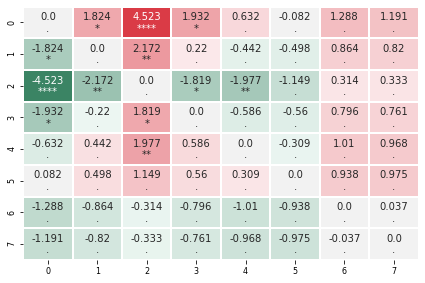

In [24]:
import csv
import matplotlib.pyplot as plt
import pandas as pd 
plt.rcParams.update({'font.size': 8}) #font size 

df_dataset1 = pd.read_excel(r'Data/Dataset1_tTest/dataset1_t_test_Star0.xlsx')
#for index, row in df_dataset1.iterrows():

# for index, row in dft_PeeScore.iterrows():
#     # unpickled_df.at[index, 'topic' + str(j) + '_max'] = 1
#     dft_PeeScore.at[index, [1]] = row[1]+
# _r reverses the normal order of the color map 'RdYlGn'


listA = [dft_testScore.values.T.tolist()[i] for i in range(1, len(dft_testScore.values.T.tolist()))]
listB = [dft_PeeScore.values.T.tolist()[i] for i in range(1, len(dft_PeeScore.values.T.tolist()))]
listC = [dft_StarScore.values.T.tolist()[i] for i in range(1, len(dft_StarScore.values.T.tolist()))]

#listA = dft_testScore.values.T.tolist()
#listB = dft_PeeScore.values.T.tolist()
#listC = dft_StarScore.values.T.tolist()


for i in range(len(listA)):
    for j in range(len(listA[i])):
        #listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(round(listB[i][j], 3))+'\n'+str(listC[i][j])
        listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(listC[i][j])
       
print(listC)    
#print('listA:: ' + str(len(listA)))
#print('listB:: ' + str(len(listB)))
#print('listC:: ' + str(len(listC)))
fig, ax = plt.subplots(figsize=(18/2.54, 11.83/2.54))
color = ['#008c48', '#008c48']
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(listA, cmap=cmap, linewidths=1, annot=listC, cbar = False, square =False, ax = ax, annot_kws={"size": 10})


In [ ]:
df_dataset1.head()